In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.regularizers import l2

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Credit-Card-Fraud-Detection/master/creditcard.csv')

In [3]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

📌 We have 284807  rows and 31 columns in our dataset. <br>
📌 We can see that the dataset contains *numerical* variables.

In [5]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

📌 There are no NULL values in our dataset.

In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349661,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120095,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
            letter-spacing:0.5px"> <a id='3'></a>
    
    Data Visualization and Analysis 
</div>

## **Heat Map Correlation** <a id='3.1' ></a>

<AxesSubplot:>

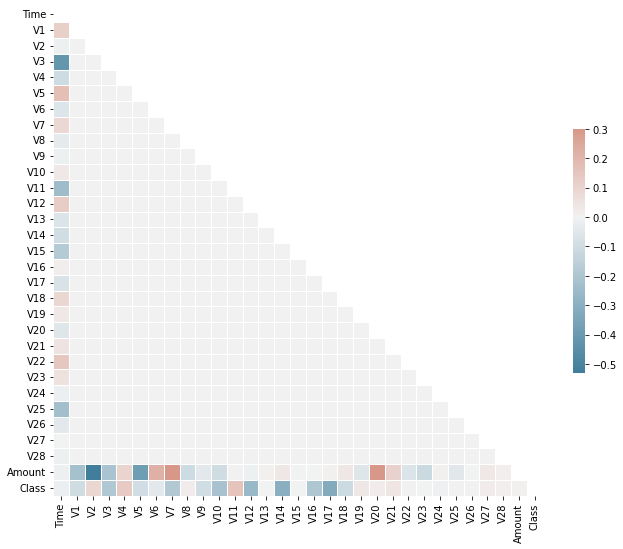

In [7]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## **Pie Chart** <a id='3.2' ></a>

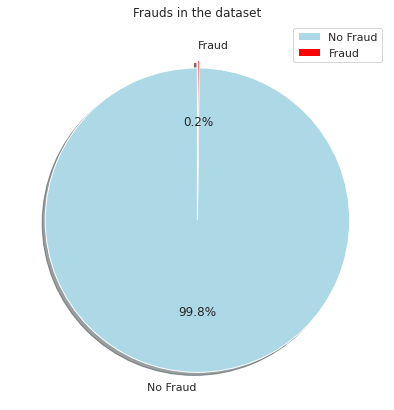

In [8]:
sns.set(style="whitegrid")
labels = ['No Fraud', 'Fraud']
sizes = dataset['Class'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Frauds in the dataset')
plt.legend()
plt.show()

📌 It seems our dataset is highly imbalance. I'll take care of it later.

## **Distribution Plot** <a id='3.3' ></a>

### *V* Features <a id='3.3.1' ></a>

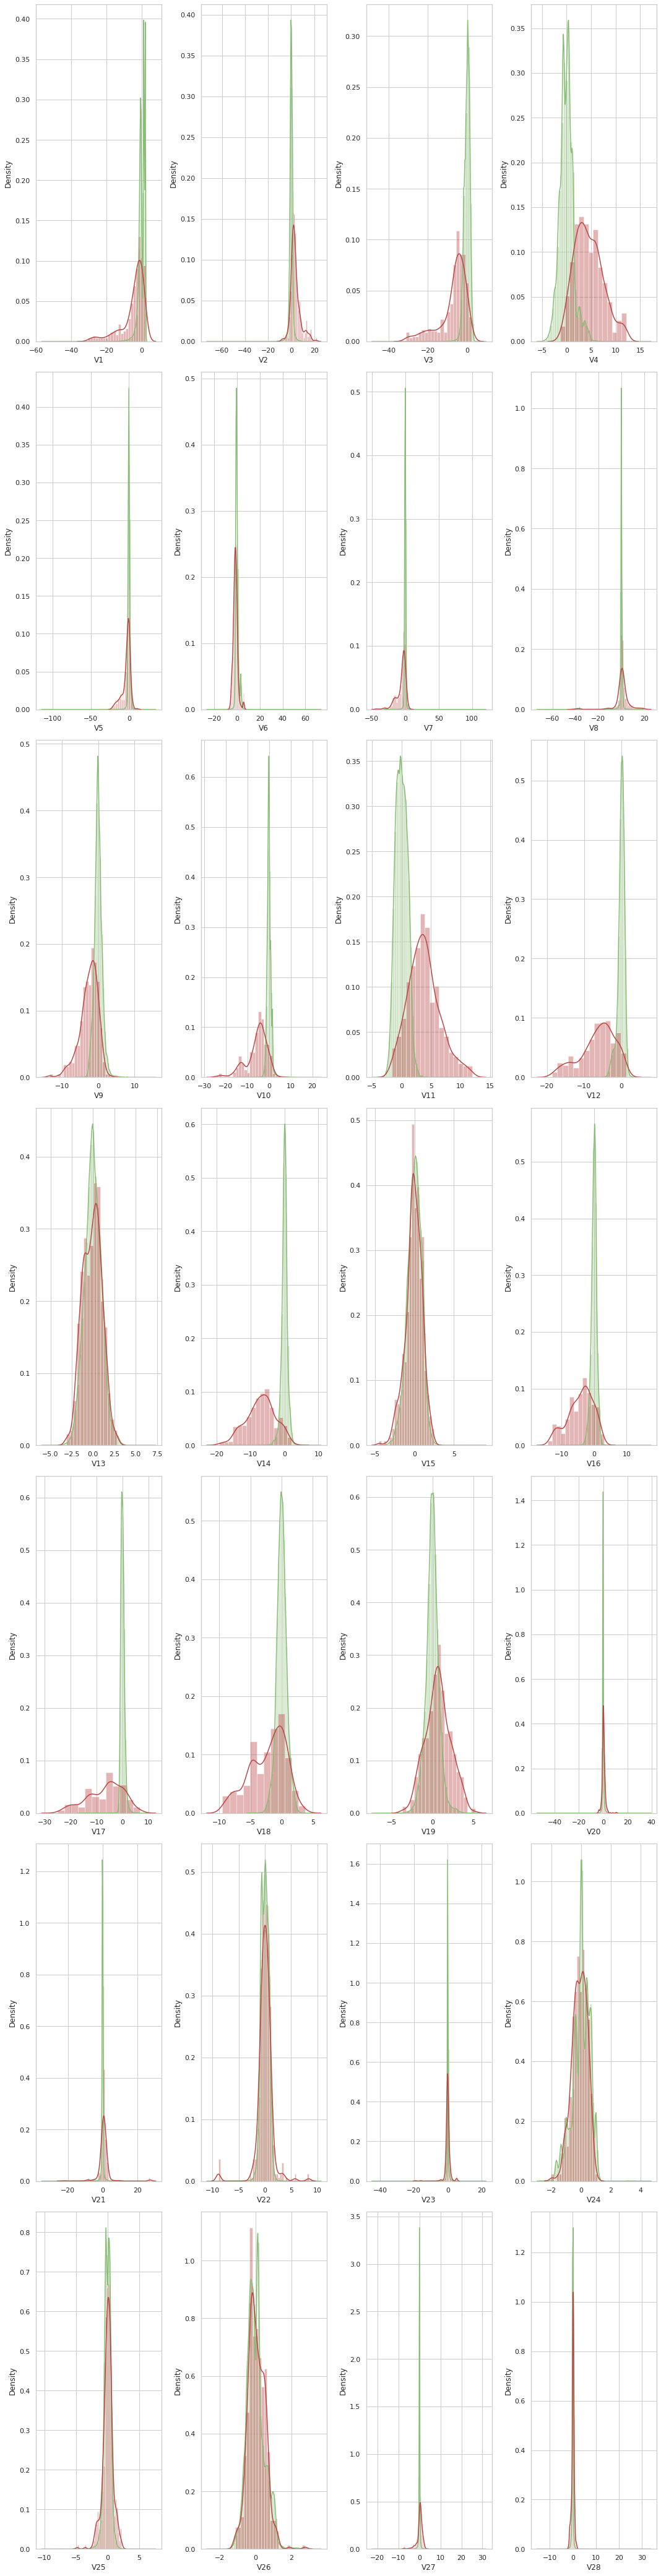

In [9]:

V = dataset[[col for col in dataset.columns if 'V' in col]+['Class']]

f, ax = plt.subplots(ncols = 4, nrows = 7, figsize=(15,2*len(V.columns)))

for i, c in zip(ax.flatten(), V.columns):
    sns.distplot(V[c][V['Class'] == 0],color='#87bd75', ax = i) #Genuine
    sns.distplot(V[c][V['Class'] == 1],color='#b94646', ax = i) #Fraud   
f.tight_layout()

📌 We can see a interesting different distribuition in some of our features.

### Genuine vs Fraud by Time <a id='3.3.2' ></a>

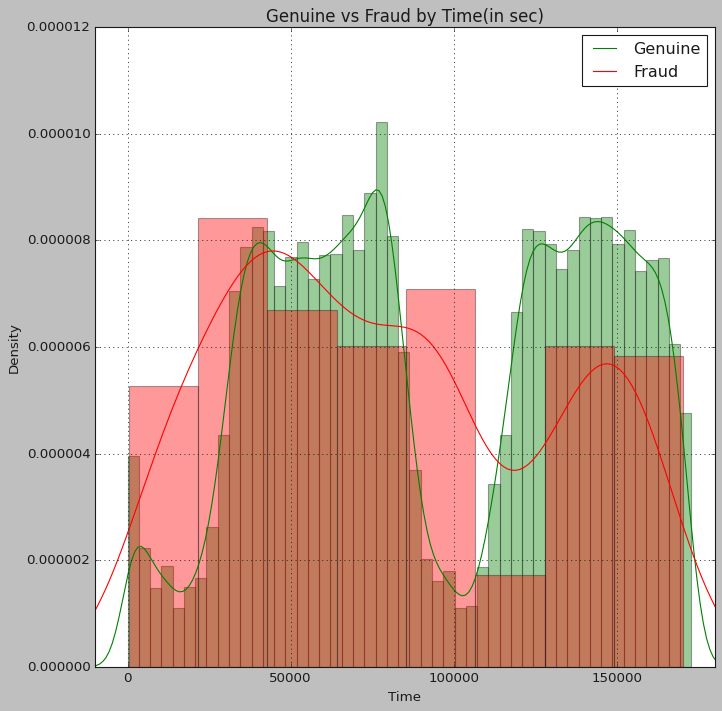

In [10]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Class'] == 0]["Time"], color='green') # Genuine - green
sns.distplot(dataset[dataset['Class'] == 1]["Time"], color='red') # Fraud - Red

plt.title('Genuine vs Fraud by Time(in sec)', fontsize=15)
plt.xlim([-10000,180000])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine','Fraud'])
plt.show()

📌 From the above graph, we can see that most frauds have happened in the early mornings.

### Genuine vs Fraud by Amount <a id='3.3.3' ></a>

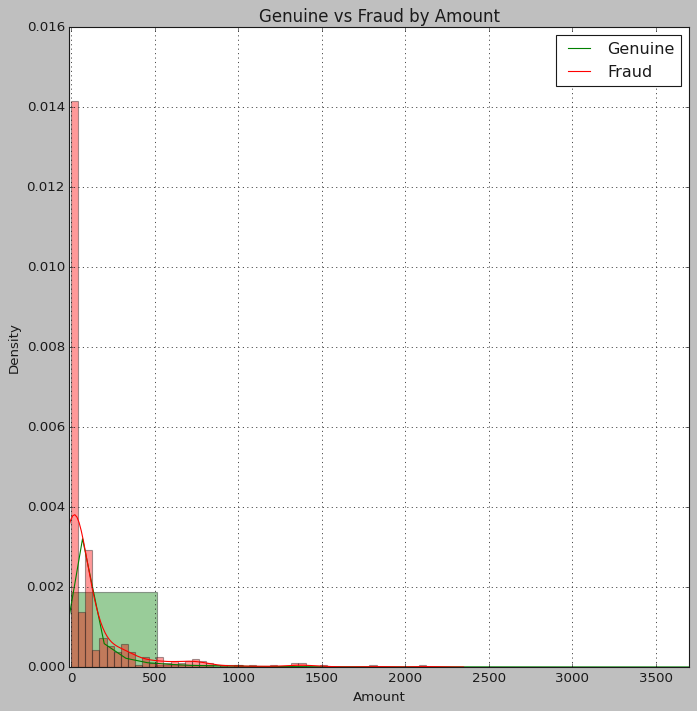

In [11]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Class'] == 0]["Amount"], color='green') # Genuine - green
sns.distplot(dataset[dataset['Class'] == 1]["Amount"], color='red') # Fraud - Red

plt.title('Genuine vs Fraud by Amount', fontsize=15)
plt.xlim([-10,3700])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine','Fraud'])
plt.show()

📌 From above graph, we can see that there are a lot of transactions with amount less than 500.

## **Outliers** <a id='3.4' ></a>

📌 An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

### Detection <a id='3.4.1' ></a>

📌 In this notebook, we are using Box Plot to detect the outliers of each features in our dataset, where any point above or below the whiskers represent an outlier.

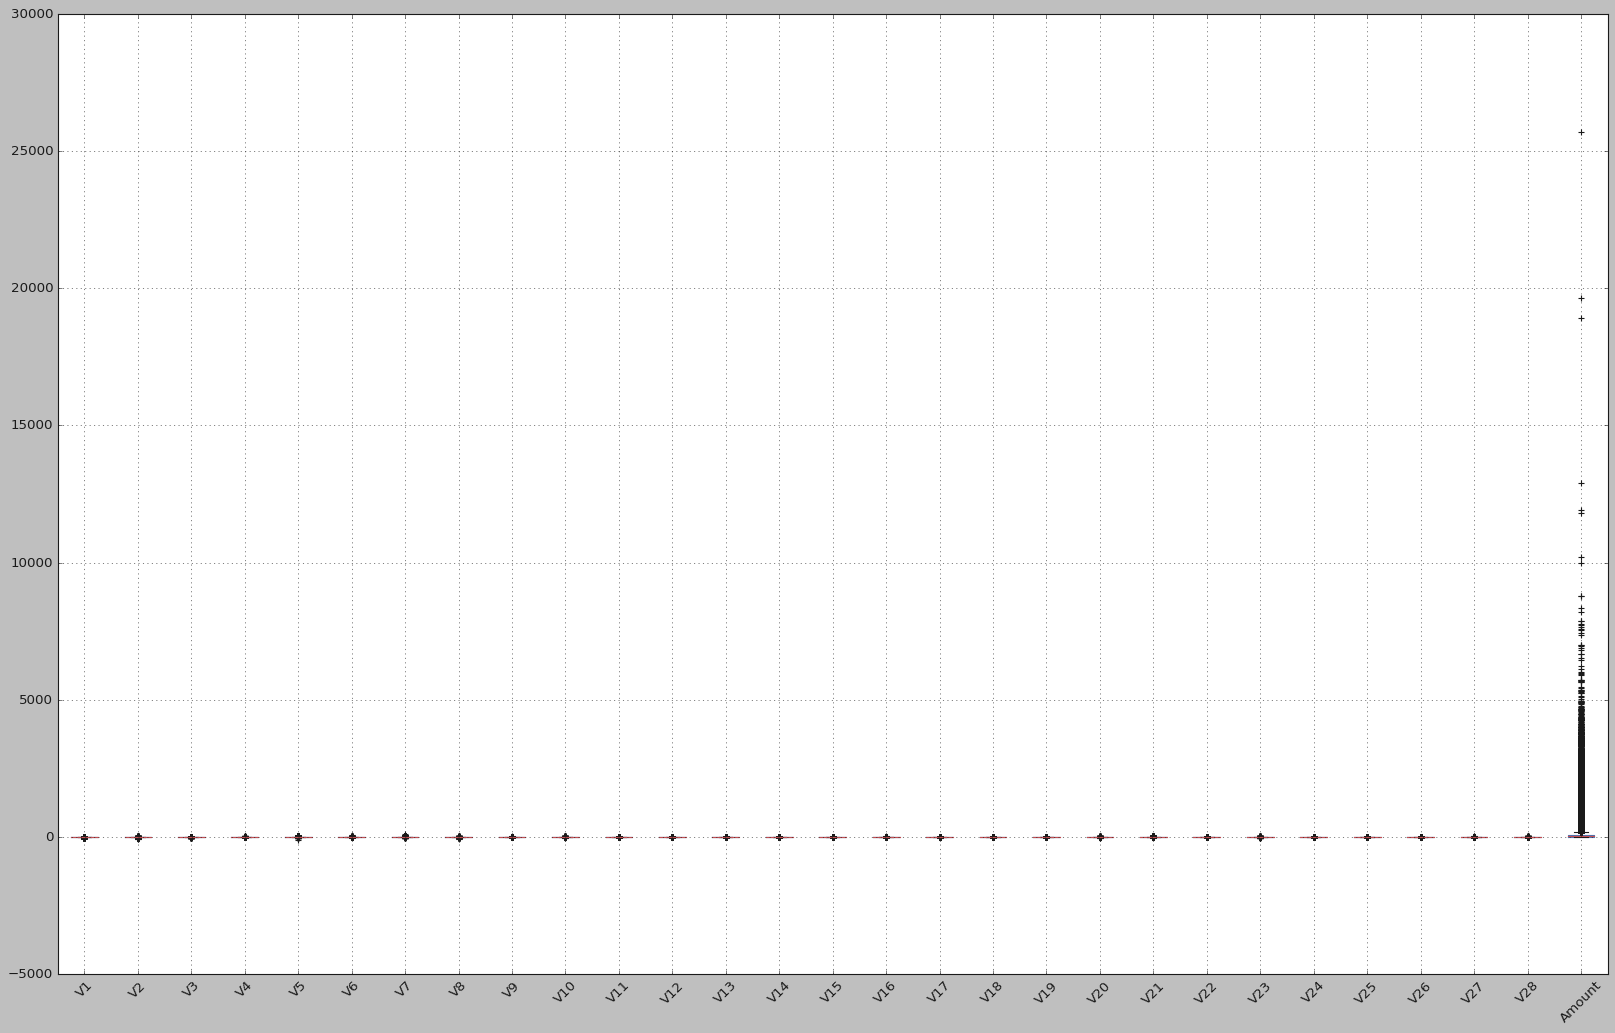

In [12]:
plt.figure(figsize=[25,15])
dataset.boxplot(column= ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.xticks(rotation=45)
plt.show()

### Removal <a id='3.4.2' ></a>

## **Feature Scaling** <a id='4.1'></a>

📌 StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler results in a distribution with a standard deviation equal to 1.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset[['Time', 'Amount']] = sc.fit_transform(dataset[['Time', 'Amount']])

## **Splitting data into Train and Test Set** <a id='4.2'></a>

In [15]:
x = dataset.drop('Class', axis=1).values
y = dataset['Class']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [17]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (227845, 30)
Number transactions y_train dataset:  (227845,)
Number transactions x_test dataset:  (56962, 30)
Number transactions y_test dataset:  (56962,)


## **BorderlineSMOTE and RandomUnderSampler** <a id='4.3'></a>

📌 *BorderlineSMOTE* is a popular extension to *SMOTE* involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model. <br>
📌 Instead of generating new synthetic examples for the minority class blindly, we would expect the Borderline-SMOTE method to only create synthetic examples along the decision boundary between the two classes.

📌 *RandomUnderSampler* involves randomly selecting examples from the majority class to delete from the training dataset. <br>
📌 This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.

In [18]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

from collections import Counter

In [19]:
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.7)

steps = [('o', over), ('u', under)]

In [20]:
pipeline = Pipeline(steps=steps)

# transform the dataset
x_sm, y_sm = pipeline.fit_resample(x_train, y_train)

print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 227454, 1: 391})
Counter({0: 129972, 1: 90981})


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:LightSlateGray;
           font-size:150%;
           text-align:center;
           letter-spacing:0.5px"> <a id = '5'></a>

    Keras ANN 
</div>

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

## **Building the ANN** <a id = '5.1'></a>

In [22]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 6, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 6, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))

## **Training the ANN** <a id = '5.2'></a>

In [23]:
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [24]:
ann_history = ann.fit(x_sm, y_sm, batch_size= 32, epochs= 50, validation_split= 0.3)

Epoch 1/50
4834/4834 [==============================] - 14s 3ms/step - loss: 0.2035 - accuracy: 0.9598 - val_loss: 0.2598 - val_accuracy: 0.9581
Epoch 2/50
4834/4834 [==============================] - 16s 3ms/step - loss: 0.1044 - accuracy: 0.9872 - val_loss: 0.1694 - val_accuracy: 0.9709
Epoch 3/50
4834/4834 [==============================] - 11s 2ms/step - loss: 0.0823 - accuracy: 0.9895 - val_loss: 0.1464 - val_accuracy: 0.9833
Epoch 4/50
4834/4834 [==============================] - 11s 2ms/step - loss: 0.0713 - accuracy: 0.9904 - val_loss: 0.1120 - val_accuracy: 0.9867
Epoch 5/50
4834/4834 [==============================] - 11s 2ms/step - loss: 0.0645 - accuracy: 0.9912 - val_loss: 0.1078 - val_accuracy: 0.9831
Epoch 6/50
4834/4834 [==============================] - 11s 2ms/step - loss: 0.0604 - accuracy: 0.9912 - val_loss: 0.1254 - val_accuracy: 0.9782
Epoch 7/50
4834/4834 [==============================] - 11s 2ms/step - loss: 0.0571 - accuracy: 0.9918 - val_loss: 0.1063 - val_ac

## **Visualizing Training and Validation Loss** <a id = '5.3'></a>

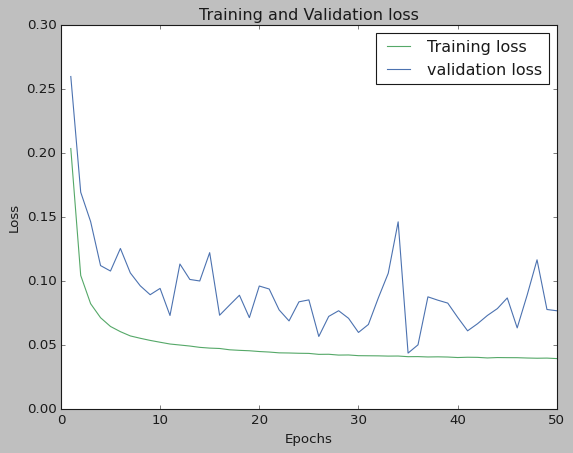

In [25]:
loss_train = ann_history.history['loss']
loss_val = ann_history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Visualizing Training and Validation Accuracy** <a id = '5.4'></a>

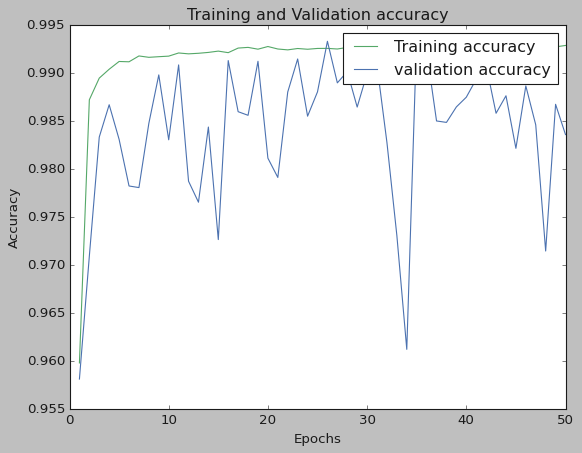

In [26]:
loss_train = ann_history.history['accuracy']
loss_val = ann_history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Making the Confusion Matrix** <a id = '5.5'></a>

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [28]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

1781/1781 [==============================] - 2s 1ms/step
[[56625   236]
 [   26    75]]
0.9954004424001967


## **Visualizing Confusion Matrix** <a id = '5.6'></a>

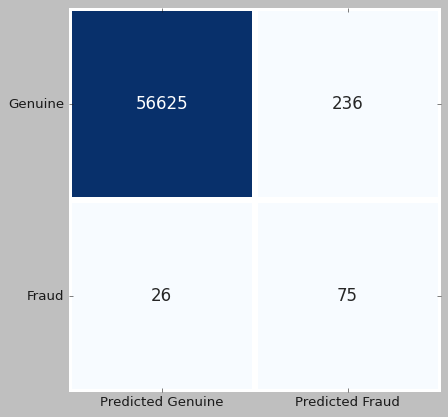

In [29]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Genuine', 'Fraud'], xticklabels = ['Predicted Genuine', 'Predicted Fraud'])
plt.yticks(rotation = 0)
plt.show()